#### 引進套件

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib inline

In [2]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) #設定中文字型

In [3]:
from matplotlib.pyplot import figure

#### 讀檔案

In [4]:
filename = '看門狗金融業merge-2014~2019.xlsx' #檔名

In [5]:
df = pd.read_excel(filename) #讀檔案

In [6]:
df.head() #看表頭

,公司,簡稱,事件日,大事件類別,小事件類別,事件內容
0,55,德意志銀行,20141128,M_經營層,4E_客戶及產品－諮詢服務,於2014-11-28，未依金管會函示原則，對國內機構法人客戶提供海外金融商品資訊及諮詢服務
1,55,德意志銀行,20150609,M_經營層,1A_內部詐欺－未經授權行為,於2015-04-30，提供營業場所及設備協助境外機構人員從事金融服務之情事，處200萬元罰鍰
2,60,法國巴黎銀行,20150609,M_經營層,1A_內部詐欺－未經授權行為,於2015-04-10，提供營業場所及設備協助境外機構人員從事金融服務之情事，處200萬元罰鍰
3,60,法國巴黎銀行,20170817,M_經營層,7A_作業流程－交易紀錄,於2017-08-17，台北分行暨國際金融業務分行辦理金融商品業務核有缺失，依銀行法應予糾正
4,2801,彰銀,20141024,I_產業前景,IF02_投資/併購/組織策略,1.頂新180億土地聯貸 告吹\n2.頂新食用油風暴持續延燒，子公司受牽連，在公股、民營行庫...


#### 第一部分

#### 整理資料

In [7]:
def date(string): #將日期轉換成日期的資料型態
    return pd.to_datetime(str(string), format='%Y%m%d')

In [8]:
date(20130514)

Timestamp('2013-05-14 00:00:00')

In [9]:
df['小事件類別'] = df['小事件類別'].map(str)
df['大事件類別'] = df['大事件類別'].map(str)
df['事件日'] = df['事件日'].map(date)
df['公司'] = df['公司'].map(str) #把公司代碼轉換成字串型態

In [10]:
biglist = sorted(list(set(df['大事件類別']))) #利用大事件類別上色
colors = ['blue', 'yellow', 'green', 'orange', 'red']
colordic = dict(zip(biglist, colors))

In [11]:
colordic

{'A_會計/財報分析': 'blue',
 'F_市場交易': 'yellow',
 'I_產業前景': 'green',
 'M_經營層': 'orange',
 'R_危機': 'red'}

In [12]:
df['color'] = df['大事件類別'].map(colordic)

#### 選取公司們以及畫圖

In [13]:
company = '2837 2895 5827 5838 5875' #把要的公司放在引號內，以空格區隔

In [14]:
companylist = company.split() 

In [15]:
rcdic = {'A_會計/財報分析': 'blue', 'F_市場交易': 'yellow', 'I_產業前景': 'green', 'M_經營層': 'orange', 'R_危機': 'red'}

#### 大圖

Text(0.5,1,'全分布圖')

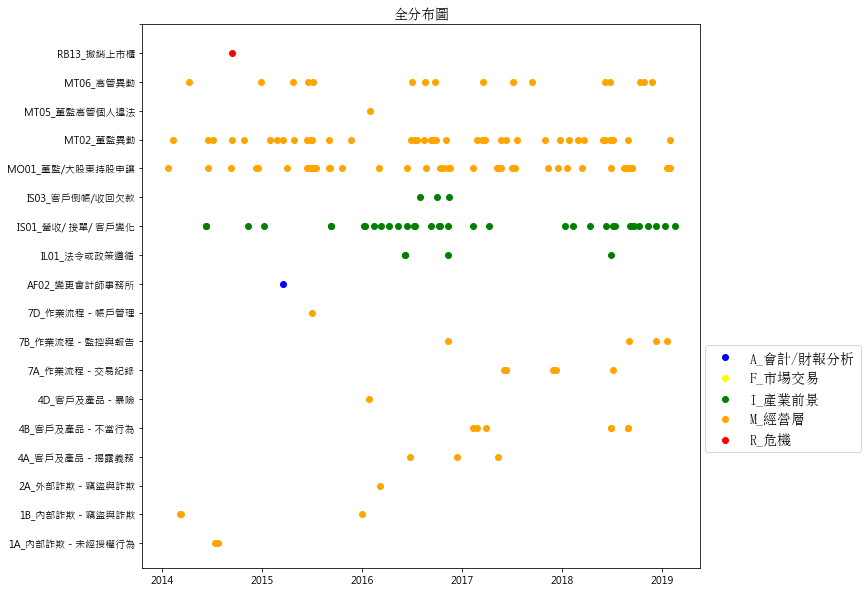

In [16]:
df_all = pd.DataFrame()

for com in companylist: #選擇公司
    df_try = df[df['公司'] == com]
    df_all = df_all.append(df_try)

df_draw = df_all.loc[:, ['簡稱', '事件日', '小事件類別', 'color']] #用來畫圖的資料表
idxlist = sorted(list(set(df_draw['小事件類別'])))
    
def position(little): #因為散布圖預設是連續變量，因此我用了這個輔助函數
        return idxlist.index(little)

df_draw['position'] = df_draw['小事件類別'].map(position) 
fig, ax1 = plt.subplots()
fig.set_figwidth(10) #設定圖片大小，這裡要稍微大一點
fig.set_figheight(10)

for pcolor, gp in df_draw.groupby('color'):

    ax1.plot_date(gp['事件日'], gp['position'], color=pcolor)
    plt.yticks(np.arange(len(idxlist) + 1), idxlist)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in rcdic.values()]
plt.legend(markers, rcdic.keys(), numpoints=1, loc='lower right', bbox_to_anchor=(1.3, 0.2), prop=font) #這裡可以自己調

plt.title('全分布圖', FontProperties=font) #設定標題及字型

#### 個別小圖 

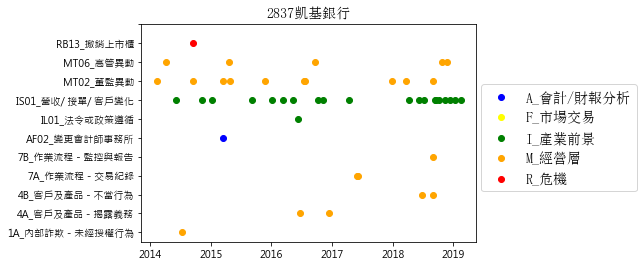

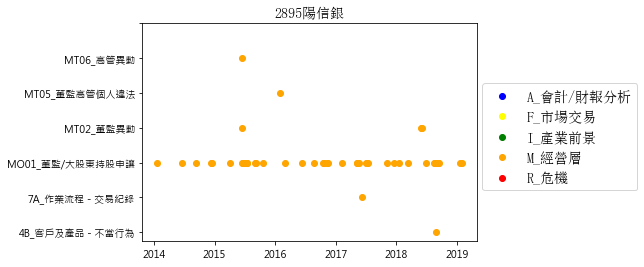

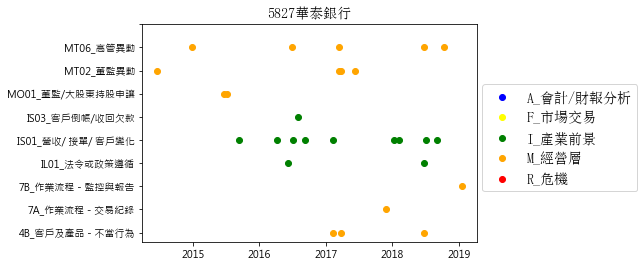

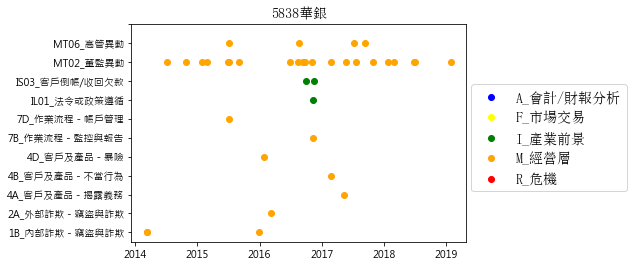

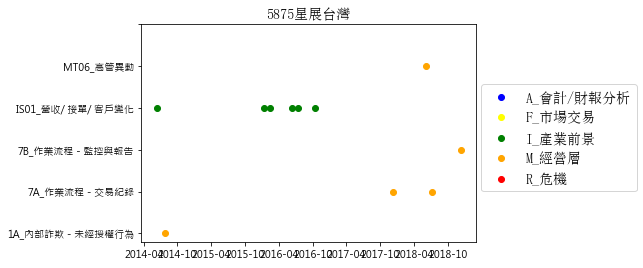

In [17]:
for com in companylist:
    df_try = df[df['公司'] == com]
    df_draw = df_try.loc[:, ['簡稱', '事件日', '小事件類別', 'color']] #用來畫圖的資料表
    idxlist = sorted(list(set(df_draw['小事件類別'])))
    
    def position(little): #因為散布圖預設是連續變量，因此我用了這個輔助函數
        return idxlist.index(little)

    df_draw['position'] = df_draw['小事件類別'].map(position)
    fig, ax1 = plt.subplots()
    for pcolor, gp in df_draw.groupby('color'):
        ax1.plot_date(gp['事件日'], gp['position'], color=pcolor)
        plt.yticks(np.arange(len(idxlist) + 1), idxlist)

    plt.title(com + df_draw['簡稱'].iloc[0], FontProperties=font) #設定標題及字型
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in rcdic.values()]
    plt.legend(markers, rcdic.keys(), numpoints=1, loc='lower right', bbox_to_anchor=(1.5, 0.2), prop=font) #這裡可以自己調

#### 第二部分

In [18]:
def parser(string): #簡化事件類別，只剩代號的函數
    s = ""
    k = 0
    while k < len(string) and string[k] != '_':
        s += string[k]
        k += 1
    return s

In [19]:
parser('4E_客戶及產品－諮詢服務')

'4E'

In [20]:
def date(string): #將日期轉換成日期的資料型態
    return pd.to_datetime(str(string), format='%Y%m%d')

In [21]:
date(20130514)

Timestamp('2013-05-14 00:00:00')

In [22]:
df['小事件類別'] = df['小事件類別'].map(parser)
df['大事件類別'] = df['大事件類別'].map(parser) #把公司代碼轉換成字串型態

In [23]:
bigtype = 'R' #選取要看的大事件類別

In [24]:
smalltype = 'RB04' #選取要查看的小事件類別

In [25]:
companylist2 = '2801 2807 2809 2812 2834 2836 2837 2838 2845 2849 2893 2895 2897 5827 5830 5835 5836 5838 5841 5843 5844 5847 5848 5849 5850 5852 5854 5857 5858 5862 5863 5870 5872 5875 5876 5879'.split() #改' '中的編號換公司

In [26]:
from itertools import cycle
cycol = cycle('bgrcm') #用來調顏色的

In [27]:
df_temp = pd.DataFrame()
for com in companylist2: #和第一部分不一樣的五家公司
    df_temp = df_temp.append(df[df['公司'] == com])
    
df_draw2 = df_temp[df_temp['小事件類別'] == smalltype].loc[:,['簡稱', '公司', '事件日']]
idxlist2 = sorted(list(set(df_draw2['公司'])))

def position2(company): #輔助畫圖的
    return idxlist2.index(company)

df_draw2['position'] = df_draw2['公司'].map(position2)

Text(0.5,1,'RB04')

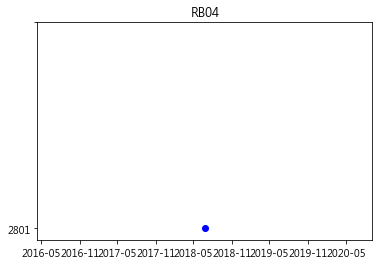

In [28]:
fig, ax1 = plt.subplots()
for com, data in df_draw2.groupby('公司'):
    ax1.plot_date(data['事件日'], data['position'], color=next(cycol))
plt.yticks(np.arange(len(idxlist2) + 1), idxlist2)
plt.title(smalltype)

Text(0.5,1,'R類事件')

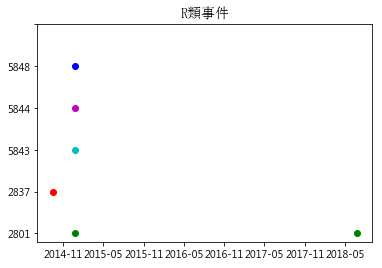

In [29]:
df_temp_big = pd.DataFrame() #創造空表格

for com in companylist2: #和第一部分不一樣的公司
    df_temp_big = df_temp_big.append(df[df['公司'] == com])
    
df_draw_big = df_temp_big[df_temp['大事件類別'] == bigtype].loc[:,['簡稱', '公司', '事件日']]
idxlist_big = sorted(list(set(df_draw_big['公司'])))

def position_big(company): #輔助畫圖的
    return idxlist_big.index(company)

df_draw_big['position'] = df_draw_big['公司'].map(position_big)

fig, ax1 = plt.subplots()
for com, data in df_draw_big.groupby('公司'):
    ax1.plot_date(data['事件日'], data['position'], color=next(cycol))

plt.yticks(np.arange(len(idxlist_big) + 1), idxlist_big)
plt.title(bigtype + '類事件', FontProperties=font)